In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
start_time = time.time()

In [3]:
# Load the CSV file into a DataFrame
test = pd.read_csv("test.csv", index_col=0)
train = pd.read_csv("train.csv", index_col=0)

# Part 1: Explorization 
#### Data exploration and visualization:

In [4]:
# Print the shape of the data
print(f"The shape of the train data set : {train.shape[0]} rows and {train.shape[1]} columns")
print(f"The shape of the test data set : {test.shape[0]} rows and {test.shape[1]} columns")


The shape of the train data set : 55462 rows and 16 columns
The shape of the test data set : 18000 rows and 15 columns


In [5]:
# make copies 
train_copy = train.copy()
test_copy = test.copy()

In [6]:
#Check for duplicates
train_copy  = train_copy.drop_duplicates()
print(f"The shape of the train data set without duplicates: {train_copy.shape[0]} rows and {train_copy.shape[1]} columns")

test_copy  = test_copy.drop_duplicates()
print(f"The shape of the test data set without duplicates: {test_copy.shape[0]} rows and {test_copy.shape[1]} columns")

The shape of the train data set without duplicates: 55462 rows and 16 columns
The shape of the test data set without duplicates: 18000 rows and 15 columns


#### We will start by exploring the train data set

In [7]:
# See how the tarin data set looks like:
train_copy

,worked_in_the_past,age_group,disability,is_dev,education,sex,mental_issues,years_of_experience,A,B,C,D,country,prev_salary,stack_experience,label
ID,,,,,,,,,,,,,,,,
65168,T,young,No,developer,NaN,Male,No,13.0,-1.093080,1.0,aa,180.984266,NaN,67104.0,Bash/Shell;Java;JavaScript;PowerShell;Python;T...,1
38314,T,young,No,non-developer,other,Male,Yes,7.0,5.444533,7.0,rhz,180.677533,United States of America,101000.0,Bash/Shell;JavaScript;PowerShell;Python;Docker...,0
5209,T,old,No,developer,other,Male,Yes,25.0,1.727255,15.0,aa,177.746162,United States of America,70000.0,Bash/Shell;HTML/CSS;Java;JavaScript;PHP;SQL;Gi...,0
54165,T,young,NaN,developer,other,Male,No,10.0,17.804302,7.0,aa,176.952584,Spain,40956.0,C#;Dart;Delphi;Kotlin;SQL;VBA;Docker;Unity 3D;...,0
42213,T,young,No,developer,BA/BSc,Male,No,12.0,-8.679091,4.0,hr,179.393259,Canada,101509.0,Assembly;Bash/Shell;C++;PowerShell;Python;Rust,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64649,T,young,No,developer,BA/BSc,Male,No,7.0,6.868416,2.0,aa,NaN,United States of America,80000.0,NaN,1
57832,T,NaN,NaN,developer,MA/MSc,Male,No,22.0,2.030205,20.0,ca,178.055004,Brazil,149568.0,Bash/Shell;C++;Java;JavaScript;PHP;SQL;Docker;...,1
47358,T,old,No,developer,BA/BSc,Male,No,35.0,1.473015,35.0,aa,182.771752,United States of America,NaN,Bash/Shell;HTML/CSS;JavaScript;Python;SQL;Type...,1


In [8]:
# Summarize train data Structure and Feature Type
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55462 entries, 65168 to 40806
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   worked_in_the_past   53697 non-null  object 
 1   age_group            52922 non-null  object 
 2   disability           51781 non-null  object 
 3   is_dev               53372 non-null  object 
 4   education            52446 non-null  object 
 5   sex                  52234 non-null  object 
 6   mental_issues        53047 non-null  object 
 7   years_of_experience  52898 non-null  float64
 8   A                    53327 non-null  float64
 9   B                    51927 non-null  float64
 10  C                    52460 non-null  object 
 11  D                    52843 non-null  float64
 12  country              53443 non-null  object 
 13  prev_salary          52798 non-null  float64
 14  stack_experience     41420 non-null  object 
 15  label                55462 non-n

* We can see that the dataset contains a mix of categorical and numerical variables.
* There are more object type variables then numeric type. 
* Except from one int type variable that belongs to the label all numeric type variables are from float type. 


#### Exploring the Numeric and Binary Features

In [9]:
# statistics of numeric features
train_copy.describe()

,years_of_experience,A,B,D,prev_salary,label
count,52898.000000,53327.000000,51927.000000,52843.000000,52798.000000,55462.000000
mean,14.214847,4.003959,9.079612,179.580295,67800.074662,0.536223
std,9.391586,6.392311,7.965858,1.094272,49583.999657,0.498691
min,0.000000,-21.637116,0.000000,175.077992,1.000000,0.000000
25%,7.000000,-0.362863,3.000000,178.843985,28800.000000,0.000000
50%,12.000000,3.606089,7.000000,179.584091,57660.000000,1.000000
75%,20.000000,7.852744,12.000000,180.323694,95979.000000,1.000000
max,50.000000,55.495063,50.000000,184.151007,224000.000000,1.000000


* The years of experience ranges from 0 to 50 years, with a mean of 14.21 years.
* The previous salary has a narrow range and low standard deviation, suggesting salaries are closely clustered around the mean.
* Label Distribution : Fairly balanced between 0 and 1, with a slight skew towards 1 (mean = 0.536223). The fact that mean of the label is approximately 0.54, indicating that, on average, about 54% of candidates were hired (label = 1). Visualization below:


* # We can see that the minimum value of prev_salary is 1.0 - we will check if that is an outlier.

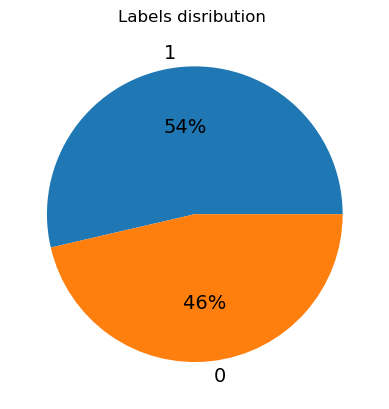

In [10]:
# Visualitation of labels disribution 
train_copy["label"].value_counts().plot.pie(autopct="%1.0f%%", fontsize=14)
plt.title("Labels disribution ", size=12)
plt.ylabel("")
plt.show()

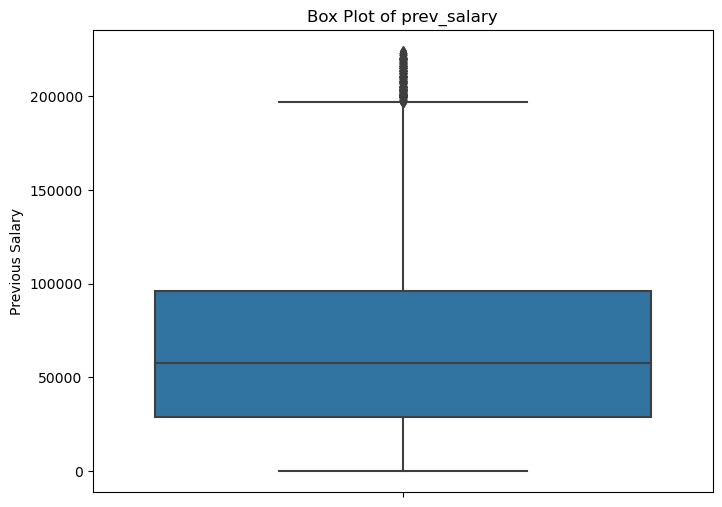

In [11]:
# A box plot will show the distribution of prev_salary and highlight any outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(y=train_copy["prev_salary"])
plt.title('Box Plot of prev_salary')
plt.ylabel('Previous Salary')
plt.show()

* The minimum value of 1.0 does not appear to be visually highlighted as an outlier in this box plot because it is within the range of the lower whisker. This suggests that the lower values are not considered unusual compared to the higher end outliers.

* There is a notable presence of high-value outliers, which can significantly impact statistical analysis like mean and standard deviation. We can see them above the upper whiske.

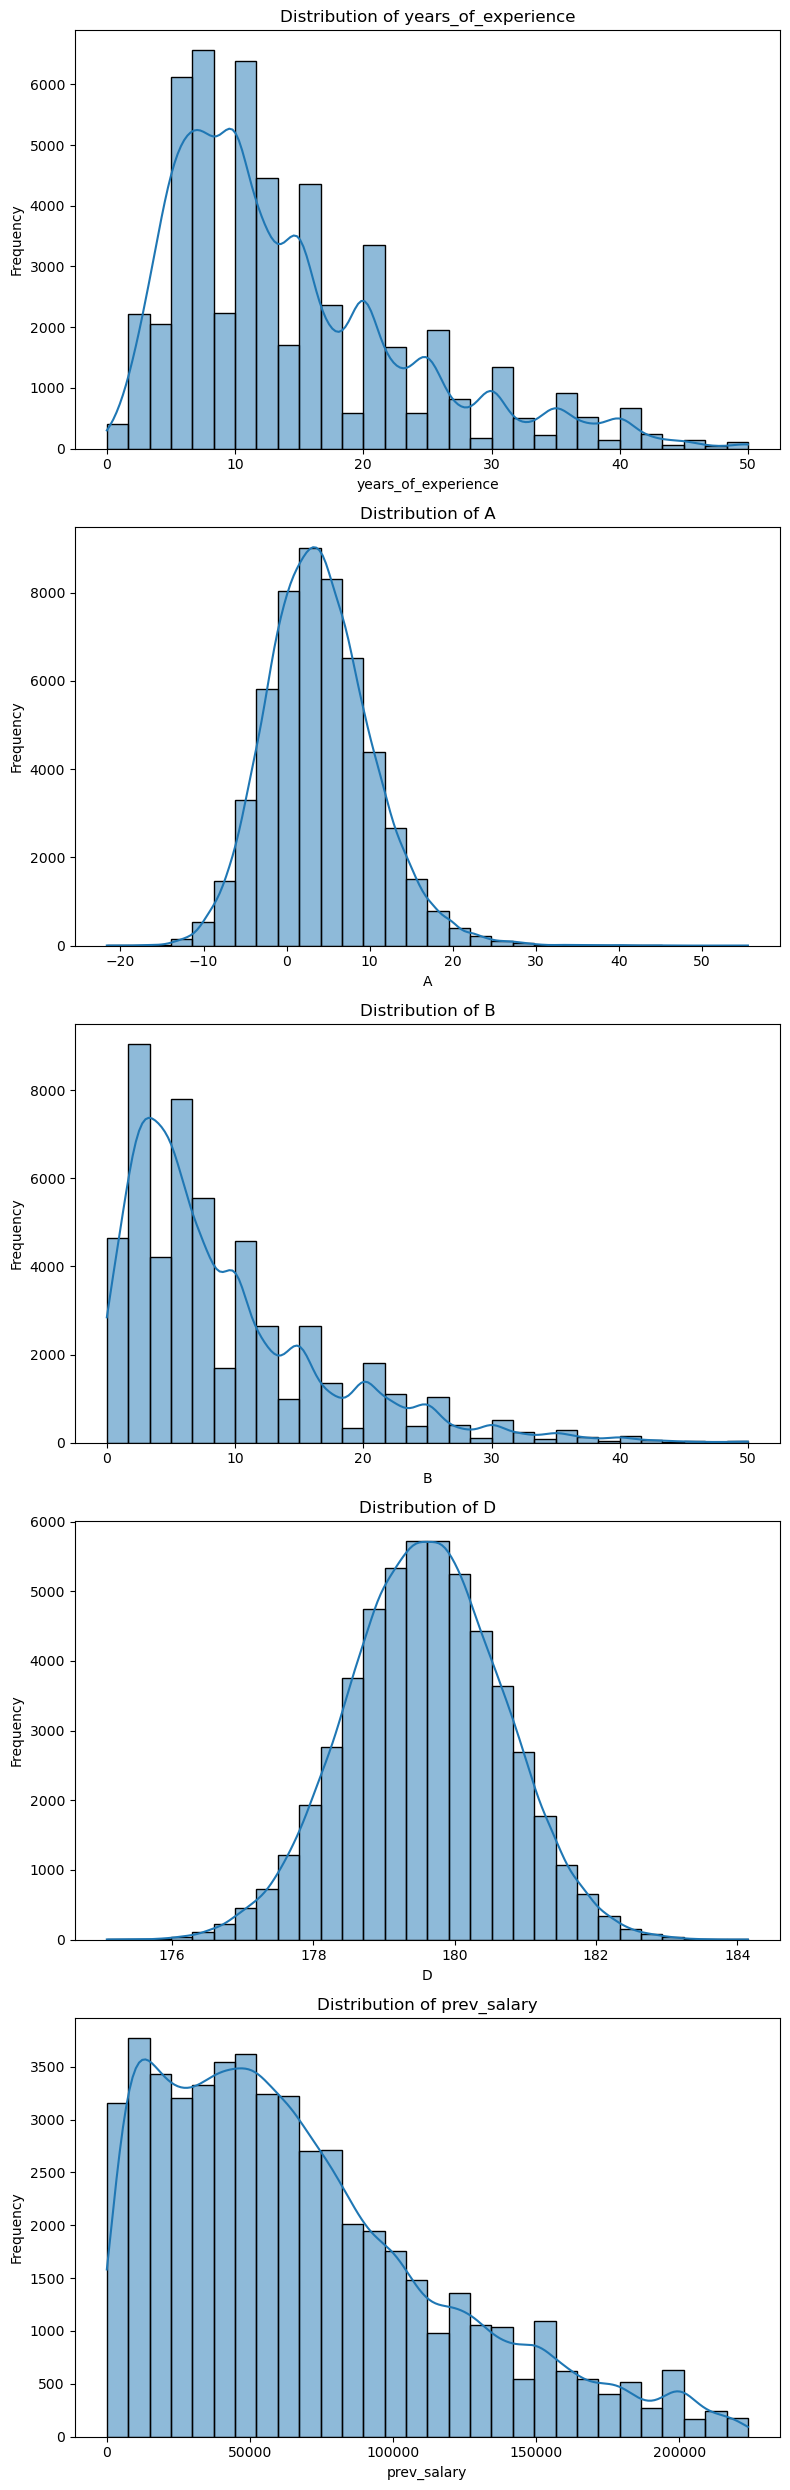

In [12]:


# List of numeric columns
numeric_columns = ['years_of_experience', 'A', 'B', 'D', 'prev_salary']

# Number of rows and columns for the grid
num_rows = len(numeric_columns)
num_columns = 1

# Create the figure
fig = plt.figure(figsize=(8, num_rows * 5))

# Loop through the numeric columns and create a subplot for each
for index, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, num_columns, index)
    sns.histplot(train_copy[column].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

From the histogram of prev_salary, we can make several observations:

Distribution Shape:
* The distribution of previous salaries is right-skewed, with a larger number of lower salaries and a long tail extending towards higher salaries.
This skewness indicates that while most previous salaries are lower, there are a few very high salaries that stretch the distribution.
* The data is not normally distributed. A normal distribution would be symmetric around the mean and would form a bell curve.

Central Tendency: 
* The majority of the salaries appear to be clustered around the lower to mid-range values, roughly between 0 and 100,000.


Outliers:
* # The long tail and presence of high salary values confirm the existence of high-value outliers in the dataset.


In [ ]:
num_rows = 5
num_columns = 3
fig = plt.figure(figsize=(30, 30))

for index, column in enumerate(NUMERIC_COLUMNS, start=1):
    plt.subplot(num_rows, num_columns, index)
    plt.title(f"Comparing Label with {column}", size=20)
    plt.xlabel(column)
    sns.barplot(data = exploration_train, y=column, x='label', errorbar='ci')

KeyboardInterrupt: 

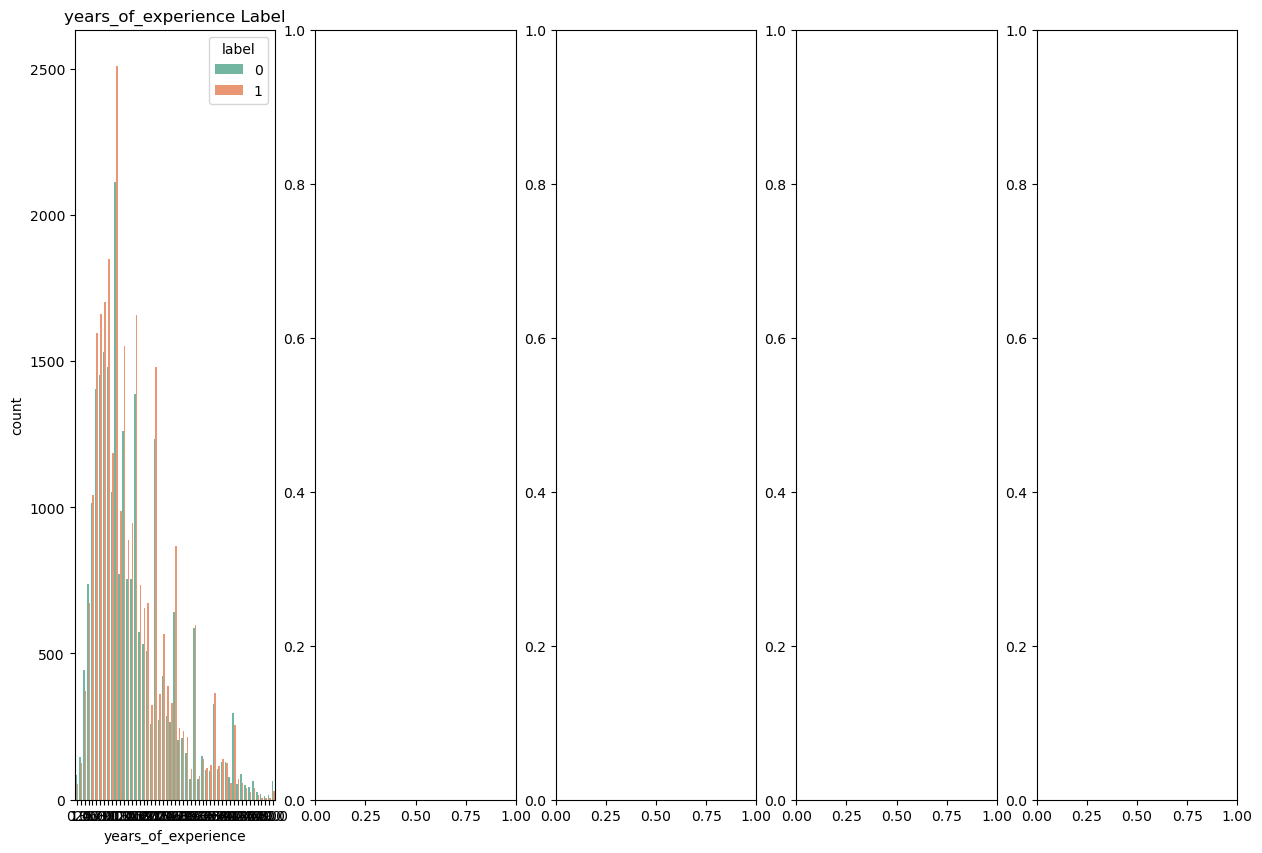

In [13]:

# Sample categorical columns
numeric_columns = ['years_of_experience', 'A', 'B', 'D', 'prev_salary']

# Create subplots
fig, ax = plt.subplots(1,5, figsize=(15, 10), sharex=False)

# Generate count plots for each categorical column
for i, col in enumerate(numeric_columns):
    sns.countplot(data=train_copy, x=col, hue='label', ax=ax[i], palette='Set2').set(title=f'{col} Label')

# Adjust layout
plt.tight_layout()
plt.show()

#### Exploring the Categorial Features

In [ ]:
# statistics of object features
train_copy.describe(include='object')

In [ ]:

# Sample categorical columns
selected_categorial_columns = ['worked_in_the_past','disability', 'age_group','is_dev', 'education', 'sex', 'mental_issues','country']

# Create subplots
fig, ax = plt.subplots(2,4, figsize=(15, 10), sharex=False)

# Flatten the axes array for easier iteration
ax = ax.flatten()

# Generate count plots for each categorical column
for i, col in enumerate(selected_categorial_columns):
    sns.countplot(data=train_copy, x=col, hue='label', ax=ax[i], palette='Set2').set(title=f'{col} Label')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Get the counts for each country
country_counts = train_copy['country'].value_counts().nlargest(10)

# Plot a pie chart for the top 10 countries
plt.figure(figsize=(12, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries Distribution')
plt.show()

In [ ]:

# Plot the distribution of the 'C' column
plt.figure(figsize=(12, 6))
sns.countplot(data=train_copy, x='C', order=train_copy['C'].value_counts().index)
plt.title('Distribution of C Column')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Plot the distribution of the 'C' column with hue='label'
plt.figure(figsize=(12, 6))
sns.countplot(data=train_copy, x='C', hue='label', order=train_copy['C'].value_counts().index)
plt.title('Distribution of C Column with Label')
plt.xticks(rotation=90)
plt.show()